In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [26]:
Apple = pd.read_csv("AAPL.csv")
Google = pd.read_csv("GOOG.csv")
Microsoft = pd.read_csv("MSFT.csv")
Amazon = pd.read_csv("AMZN.csv")

## Apple

In [27]:
Apple.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,122.59,124.85,121.20,121.26,121.26,"16,43,20,000"
1,25-Feb-2021,124.68,126.46,120.54,120.99,120.99,"14,73,06,500"
2,24-Feb-2021,124.94,125.56,122.23,125.35,125.35,"11,06,91,500"
3,23-Feb-2021,123.76,126.71,118.39,125.86,125.86,"15,78,59,100"
4,22-Feb-2021,128.01,129.72,125.60,126.00,126.00,"10,36,07,600"


In [28]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9800 non-null   object 
 1   Open        9800 non-null   object 
 2   High        9725 non-null   float64
 3   Low         9725 non-null   float64
 4   Close       9725 non-null   float64
 5   Adj. Close  9725 non-null   float64
 6   Volume      9725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 536.1+ KB


In [29]:
Apple.shape

(9800, 7)

In [30]:
Apple.isnull().sum()

Date           0
Open           0
High          75
Low           75
Close         75
Adj. Close    75
Volume        75
dtype: int64

In [31]:
# Drop NULL rows
Apple.dropna(inplace = True)

In [32]:
# Change Dtype of Columns
Apple["Date"] = pd.to_datetime(Apple["Date"])
Apple["Volume"] = Apple["Volume"].str.replace(',', '')
Apple = Apple.astype({"Open": float, "Volume": float})

In [33]:
# Sort the Database by Date
Apple = Apple.sort_values(by = 'Date', ignore_index = True)

In [34]:
# Drop rows having Date < '2015-01-01'
Apple = Apple[Apple["Date"] >= '2015-01-01'].reset_index(drop = True)

In [35]:
Apple.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,50.160265,50.700723,49.618696,50.182447,48.781143,1.449887e+08
std,28.029971,28.433917,27.552589,28.007536,28.560715,7.095025e+07
min,22.500000,22.920000,22.370000,22.580000,21.130000,4.544800e+07
25%,30.000000,30.130000,29.810000,29.990000,27.910000,9.667000e+07
50%,42.020000,42.550000,41.630000,42.100000,40.600000,1.272076e+08
75%,55.100000,55.710000,54.370000,55.170000,53.980000,1.731832e+08
max,143.600000,145.090000,141.370000,143.160000,142.950000,6.488252e+08


## Google

In [36]:
Google.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,"2,050.52","2,071.01","2,016.06","2,036.86","2,036.86","20,83,500"
1,25-Feb-2021,"2,067.45","2,094.88","2,021.29","2,031.36","2,031.36","18,26,000"
2,24-Feb-2021,"2,041.83","2,100.78","2,038.13","2,095.17","2,095.17","12,47,400"
3,23-Feb-2021,"2,025.01","2,082.01","2,002.02","2,070.86","2,070.86","16,66,500"
4,22-Feb-2021,"2,067.00","2,091.42","2,062.14","2,064.88","2,064.88","13,66,200"


In [37]:
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        4162 non-null   object
 1   Open        4162 non-null   object
 2   High        4160 non-null   object
 3   Low         4160 non-null   object
 4   Close       4160 non-null   object
 5   Adj. Close  4160 non-null   object
 6   Volume      4160 non-null   object
dtypes: object(7)
memory usage: 227.7+ KB


In [38]:
Google.shape

(4162, 7)

In [39]:
Google.isnull().sum()

Date          0
Open          0
High          2
Low           2
Close         2
Adj. Close    2
Volume        2
dtype: int64

In [40]:
# Drop NULL rows
Google.dropna(inplace = True)

In [41]:
# Change Dtype of Columns
Google["Date"] = pd.to_datetime(Google["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  Google[col] = Google[col].str.replace(',', '')

Google = Google.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [42]:
# Sort the Database by Date
Google = Google.sort_values(by = 'Date', ignore_index = True)

In [43]:
# Drop rows having Date < '2015-01-01'
Google = Google[Google["Date"] >= '2015-01-01'].reset_index(drop = True)

In [44]:
Google.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,1030.784235,1041.013719,1021.141375,1031.490529,1031.490529,1.735614e+06
std,335.922147,340.932426,332.354344,336.823772,336.823772,8.338749e+05
min,493.300000,494.620000,486.230000,491.200000,491.200000,3.468000e+05
25%,756.540000,764.230000,750.000000,758.090000,758.090000,1.241200e+06
50%,1037.490000,1049.480000,1023.140000,1037.080000,1037.080000,1.525200e+06
75%,1207.140000,1219.760000,1200.130000,1208.670000,1208.670000,1.972100e+06
max,2119.270000,2152.680000,2104.360000,2128.310000,2128.310000,1.116490e+07


## Microsoft

In [45]:
Microsoft.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,231.53,235.37,229.54,232.38,232.38,"3,78,11,200"
1,25-Feb-2021,232.08,234.59,227.88,228.99,228.99,"3,94,81,600"
2,24-Feb-2021,230.01,235.20,229.00,234.55,234.55,"2,63,01,400"
3,23-Feb-2021,230.33,234.83,228.73,233.27,233.27,"3,01,91,200"
4,22-Feb-2021,237.42,237.93,232.40,234.51,234.51,"3,64,23,100"


In [46]:
Microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8890 entries, 0 to 8889
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8890 non-null   object 
 1   Open        8890 non-null   object 
 2   High        8812 non-null   float64
 3   Low         8812 non-null   float64
 4   Close       8812 non-null   float64
 5   Adj. Close  8812 non-null   float64
 6   Volume      8812 non-null   object 
dtypes: float64(4), object(3)
memory usage: 486.3+ KB


In [47]:
Microsoft.shape

(8890, 7)

In [48]:
Google.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj. Close    0
Volume        0
dtype: int64

In [49]:
# Drop NULL rows
Microsoft.dropna(inplace = True)

In [50]:
# Change Dtype of Columns
Microsoft["Date"] = pd.to_datetime(Microsoft["Date"])
Microsoft["Open"] = Microsoft["Open"].str.replace(',', '')
Microsoft["Volume"] = Microsoft["Volume"].str.replace(',', '')
Microsoft = Microsoft.astype({"Open": float, "Volume": float})

In [51]:
# Sort the Database by Date
Microsoft = Microsoft.sort_values(by = 'Date', ignore_index = True)

In [52]:
# Drop rows having Date < '2015-01-01'
Microsoft = Microsoft[Microsoft["Date"] >= '2015-01-01'].reset_index(drop = True)

In [53]:
Microsoft.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.00000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,102.995320,103.99847,101.948806,103.031343,99.744235,3.053693e+07
std,55.125024,55.79860,54.423005,55.144477,56.333505,1.474586e+07
min,40.340000,40.74000,39.720000,40.290000,35.810000,7.425600e+06
25%,56.080000,56.63000,55.610000,56.190000,51.520000,2.146110e+07
50%,89.800000,90.88000,88.400000,89.710000,85.960000,2.696110e+07
75%,137.190000,138.35000,135.930000,137.080000,134.800000,3.475450e+07
max,245.030000,246.13000,242.920000,244.990000,244.430000,1.691640e+08


## Amazon

In [54]:
Amazon.head()

,Date,Open,High,Low,Close,Adj. Close,Volume
0,26-Feb-2021,"3,095.20","3,122.44","3,036.70","3,092.93","3,092.93","42,73,500"
1,25-Feb-2021,"3,136.74","3,178.26","3,047.76","3,057.16","3,057.16","45,07,100"
2,24-Feb-2021,"3,166.75","3,171.23","3,125.38","3,159.53","3,159.53","30,03,000"
3,23-Feb-2021,"3,127.03","3,204.73","3,093.60","3,194.50","3,194.50","46,69,500"
4,22-Feb-2021,"3,208.13","3,232.32","3,172.26","3,180.74","3,180.74","35,04,600"


In [55]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5989 non-null   object
 1   Open        5989 non-null   object
 2   High        5986 non-null   object
 3   Low         5986 non-null   object
 4   Close       5986 non-null   object
 5   Adj. Close  5986 non-null   object
 6   Volume      5986 non-null   object
dtypes: object(7)
memory usage: 327.6+ KB


In [56]:
Amazon.shape

(5989, 7)

In [57]:
# Drop NULL rows
Amazon.dropna(inplace = True)

In [58]:
# Change Dtype of Columns
Amazon["Date"] = pd.to_datetime(Amazon["Date"])

for col in ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]:
  Amazon[col] = Amazon[col].str.replace(',', '')

Amazon = Amazon.astype({"Open": float, "High": float, "Low": float, "Close": float, "Adj. Close": float, "Volume": float})

In [59]:
# Sort the Database by Date
Amazon = Amazon.sort_values(by = 'Date', ignore_index = True)

In [60]:
# Drop rows having Date < '2015-01-01'
Amazon = Amazon[Amazon["Date"] >= '2015-01-01'].reset_index(drop = True)

In [61]:
Amazon.describe()

,Open,High,Low,Close,Adj. Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,1423.236514,1438.067463,1406.292744,1422.724538,1422.724538,4.301081e+06
std,834.372402,844.761504,822.021255,833.312139,833.312139,2.204558e+06
min,286.280000,290.790000,285.250000,286.950000,286.950000,8.813000e+05
25%,740.140000,746.100000,732.750000,739.610000,739.610000,2.865900e+06
50%,1368.000000,1396.030000,1344.010000,1371.990000,1371.990000,3.718100e+06
75%,1852.690000,1871.320000,1832.650000,1858.000000,1858.000000,5.070300e+06
max,3547.000000,3552.250000,3486.690000,3531.450000,3531.450000,2.385610e+07


# Exploratory Data Analysis

In [62]:
Companies = [Apple, Google, Microsoft, Amazon]
Companies_Title = ["Apple", "Google", "Microsoft", "Amazon"]

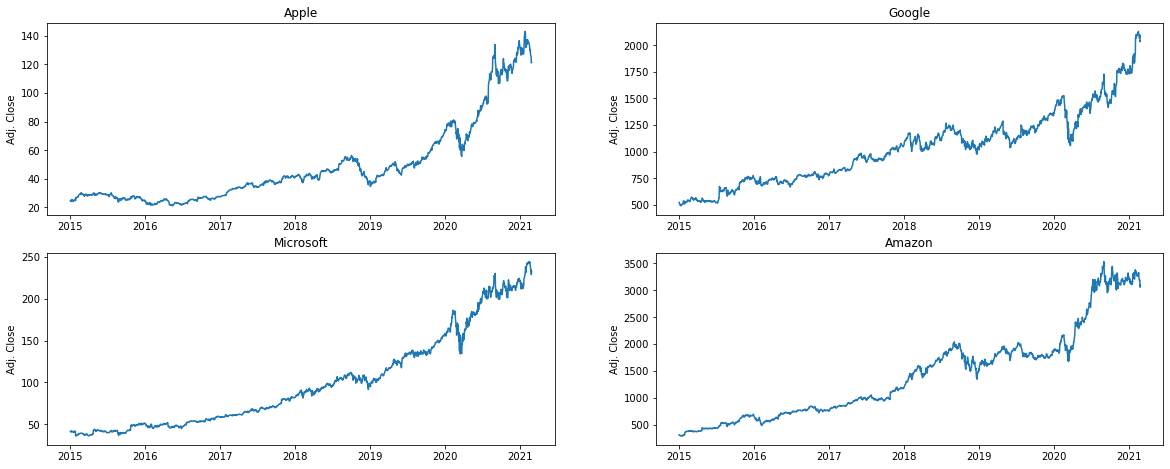

In [63]:
# Lets view historical view of the closing prices

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Adj. Close')

We can see from the  above graph that Apple shares have tremendous growth in the 2020-2021 period.

If we follow the news, it can be due to

1.   Emission Credit Sales
2.   Apple entering the Fast-Growing Compact SUV Market
3.   Starting production in China

For the rest of the Companies, we can see that COVID-19 is the primary factor affecting the 2020-2021 period.

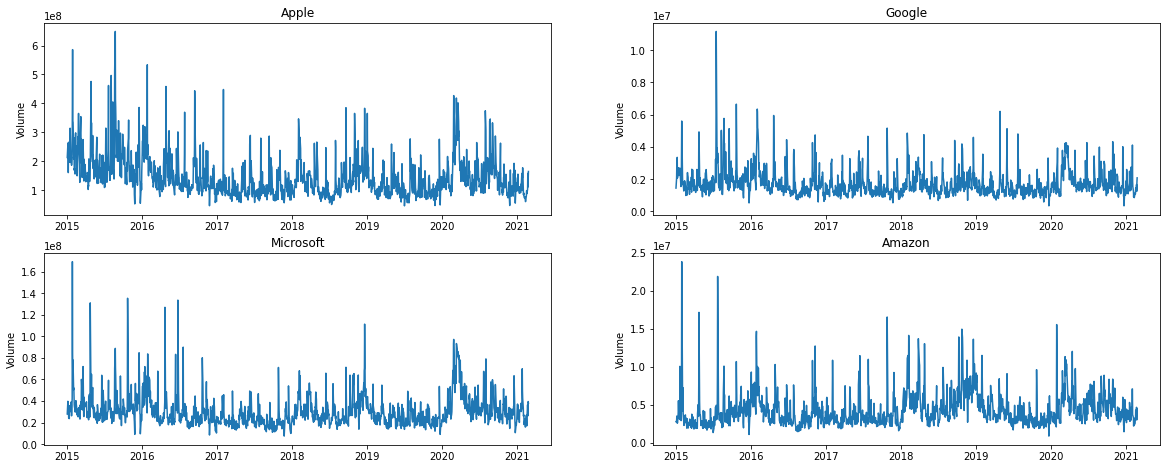

In [64]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Volume"])
  plt.title(Companies_Title[index])
  plt.ylabel('Volume')

Now, we have seen the visualizations for the closing price and volume traded each day, let's go ahead and calculate the moving average of the stock.

### What was the moving average of the various stocks ?

In [65]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Adj. Close"].rolling(Moving_Average).mean()

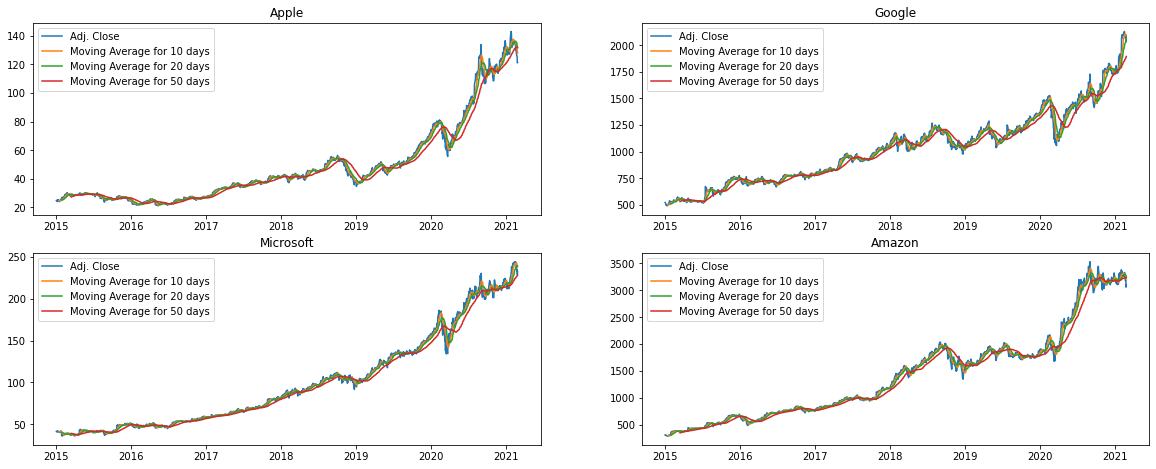

In [66]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Adj. Close"])
  plt.plot(company["Date"], company["Moving Average for 10 days"])
  plt.plot(company["Date"], company["Moving Average for 20 days"])
  plt.plot(company["Date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [67]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 
for company in Companies:
  company["Daily Return"] = company["Adj. Close"].pct_change()

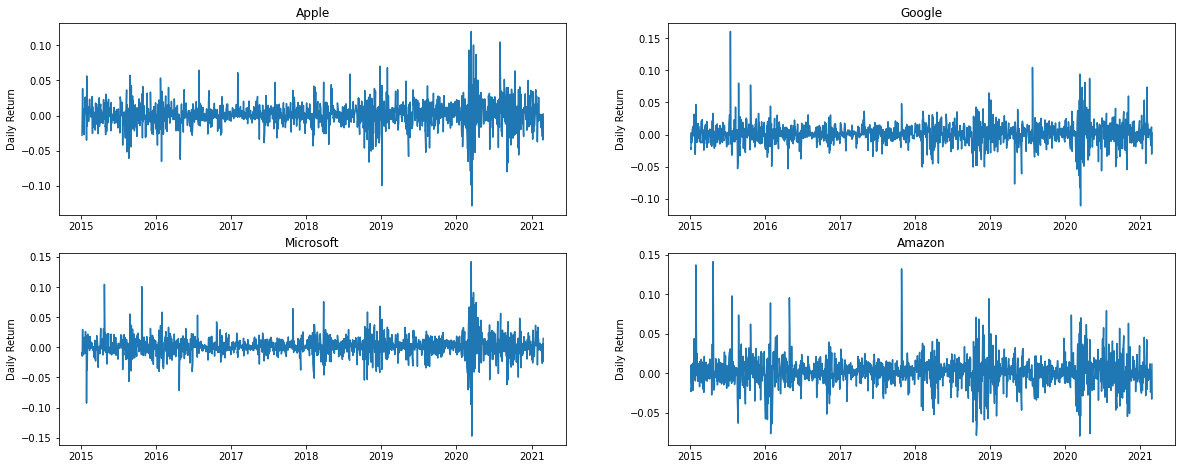

In [68]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

Now, let's get an overall at the average daily return using a histogram.

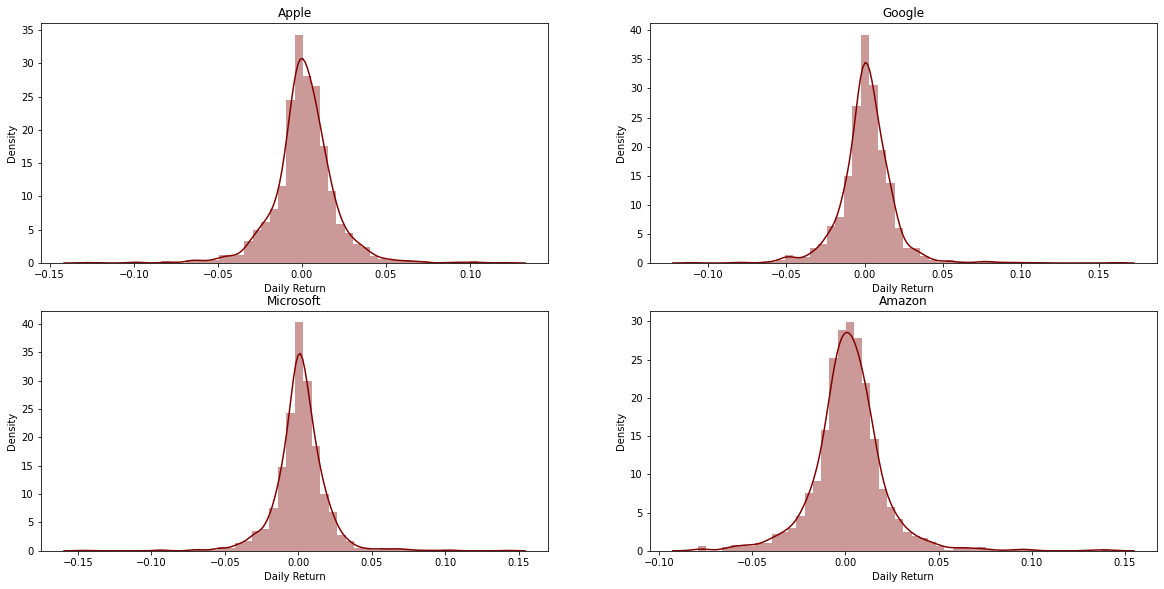

In [69]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "maroon")
  plt.title(Companies_Title[index])

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [70]:
print("Kurtosis Value")
for index, company in enumerate(Companies):
  print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 6.405686938843391
Google: 10.086026546409723
Microsoft: 10.603491741447666
Amazon: 7.135284710744968


The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

### What was the correlation between diffrent stocks closing price ?

In [71]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["Apple"] = Apple["Adj. Close"]
Companies_returns["Google"] = Google["Adj. Close"]
Companies_returns["Microsoft"] = Microsoft["Adj. Close"]
Companies_returns["Amazon"] = Amazon["Adj. Close"]
Companies_returns.head()

,Apple,Google,Microsoft,Amazon
0,24.86,523.37,41.44,308.52
1,24.16,512.46,41.06,302.19
2,24.16,500.59,40.46,295.29
3,24.50,499.73,40.97,298.42
4,25.44,501.30,42.18,300.46


In [72]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,Apple,Google,Microsoft,Amazon
0,NaN,NaN,NaN,NaN
1,-0.028158,-0.020846,-0.009170,-0.020517
2,0.000000,-0.023163,-0.014613,-0.022833
3,0.014073,-0.001718,0.012605,0.010600
4,0.038367,0.003142,0.029534,0.006836


Now, let's do a correlation plot, to get actual numerical values for the correlation between the stocks closing price

<AxesSubplot:>

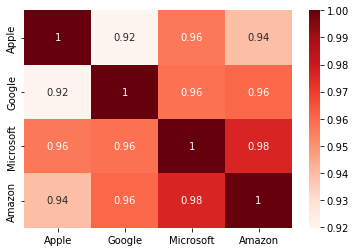

In [73]:
sns.heatmap(Companies_returns.corr(), annot=True, cmap="Reds")

Finally, let's do a correlation plot, to get actual numerical values for the correlation between the stocks daily returns.

<AxesSubplot:>

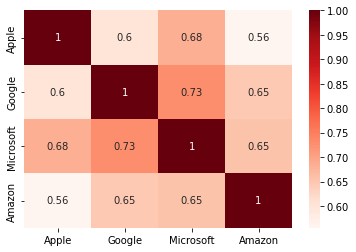

In [74]:
sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="Reds")

From the above plot, we can see that Microsoft and Google had the strongest correlation in stocks daily returns.

### How much value do we put at risk by investing in a paticular stock ?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

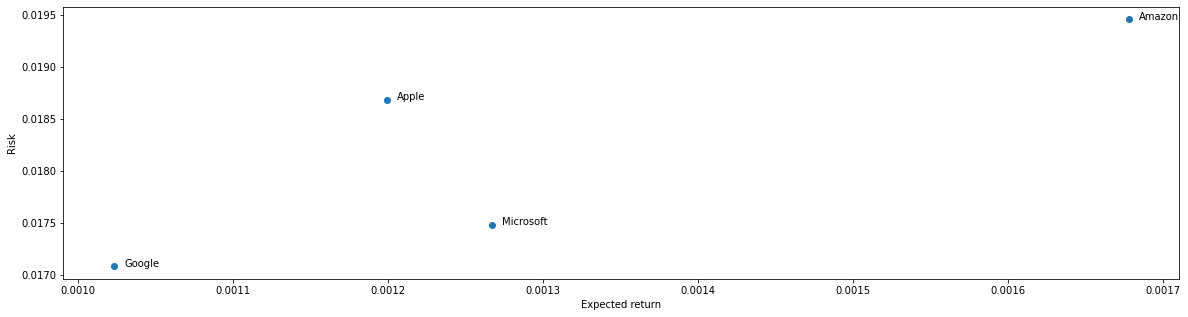

In [75]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies_Title, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')

From the above graph, we can see that Amazon has the highest expected returns and the highest risk factor. Google has the lowest expected returns and the lowest risk factor.

### Data Proprocessing

In [76]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model - LSTM

In [13]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [14]:
model = Model()

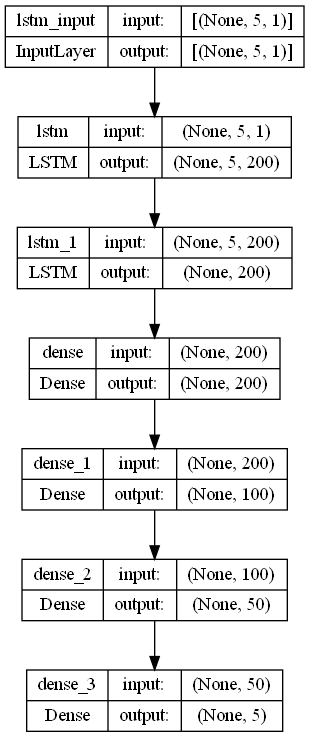

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-trai

### Custom Learning Rate

In [17]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

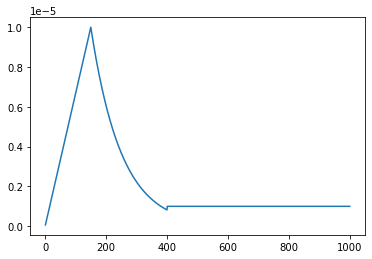

In [18]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [19]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Apple

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [41]:
Apple_Date = '2020-10-01'
Apple_Train_X,Apple_Train_Y, Apple_Test_X, Apple_Test_Y = Dataset(Apple, Apple_Date)

### Model Fitting

In [73]:
Apple_Model = Model()

In [74]:
Apple_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [75]:
Apple_hist = Apple_Model.fit(Apple_Train_X, Apple_Train_Y, epochs = 1000, validation_data = (Apple_Test_X, Apple_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 69ms/step - loss: 2299.2021 - root_mean_squared_error: 47.9500 - val_loss: 15635.7109 - val_root_mean_squared_error: 125.0428 - lr: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 18ms/step - loss: 2299.1873 - root_mean_squared_error: 47.9498 - val_loss: 15635.4326 - val_root_mean_squared_error: 125.0417 - lr: 6.6667e-08
Epoch 3/1000
9/9 [==============================] - 0s 16ms/step - loss: 2299.1387 - root_mean_squared_error: 47.9493 - val_loss: 15634.8828 - val_root_mean_squared_error: 125.0395 - lr: 1.3333e-07
Epoch 4/1000
9/9 [==============================] - 0s 18ms/step - loss: 2299.0559 - root_mean_squared_error: 47.9485 - val_loss: 15634.0703 - val_root_mean_squared_error: 125.0363 - lr: 2.0000e-07
Epoch 5/1000
9/9 [==============================] - 0s 16ms/step - loss: 2298.9373 - root_mean_squared_error: 47.9472 - val_loss: 15633.0195 - val_root_mean_squared_error: 125.0321 - lr: 2.6667e-07
Epoch 6/10

In [76]:
history_dict = Apple_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

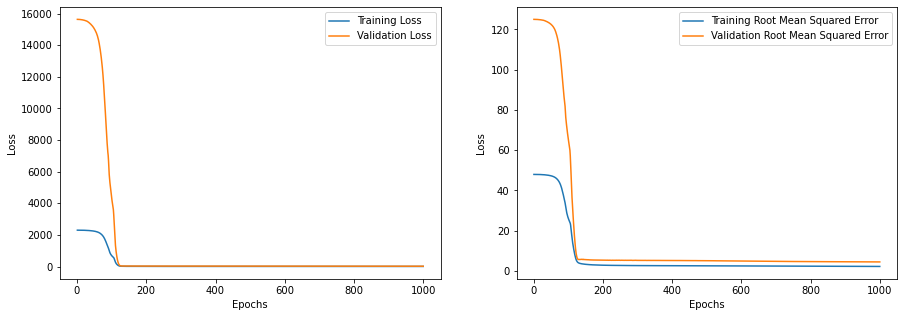

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [78]:
Apple_prediction = Apple_Model.predict(Apple_Test_X)

1/1 [==============================] - 0s 415ms/step


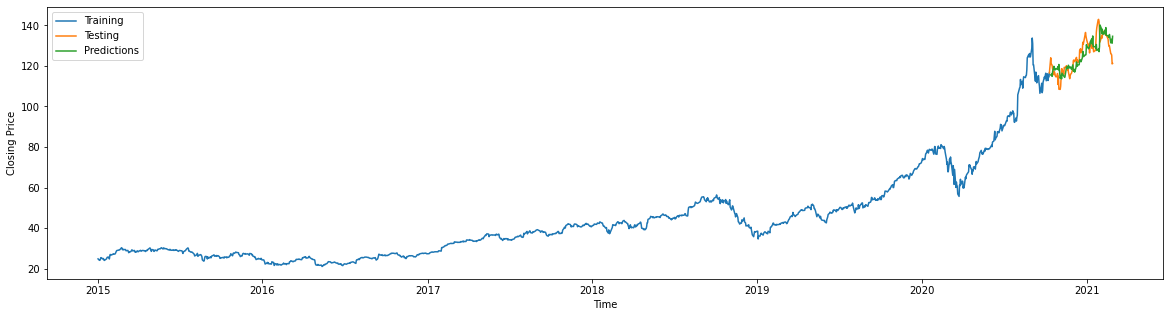

In [79]:
plt.figure(figsize=(20, 5))
plt.plot(Apple['Date'][Apple['Date'] < '2020-10-12'], Apple['Adj. Close'][Apple['Date'] < '2020-10-12'], label = 'Training')
plt.plot(Apple['Date'][Apple['Date'] >= '2020-10-09'], Apple['Adj. Close'][Apple['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(Apple['Date'][Apple['Date'] >= '2020-10-12'], Apple_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [80]:
rmse = math.sqrt(mean_squared_error(Apple_Test_Y.reshape(-1, 5), Apple_prediction))
mape = np.mean(np.abs(Apple_prediction - Apple_Test_Y.reshape(-1, 5))/np.abs(Apple_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.447478385808614
MAPE: 0.02666718039767486


# Amazon

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [36]:
Amazon_Date = '2020-11-01'
Amazon_Train_X, Amazon_Train_Y, Amazon_Test_X, Amazon_Test_Y = Dataset(Amazon, Amazon_Date)

# Model Fitting

In [82]:
Amazon_Model = Model()

In [83]:
Amazon_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [84]:
Amazon_hist = Amazon_Model.fit(Amazon_Train_X, Amazon_Train_Y, epochs = 200, validation_data = (Amazon_Test_X, Amazon_Test_Y), callbacks=[callback])

Epoch 1/200
10/10 [==============================] - 3s 65ms/step - loss: 2281432.7500 - root_mean_squared_error: 1510.4413 - val_loss: 10194517.0000 - val_root_mean_squared_error: 3192.8853 - lr: 0.0000e+00
Epoch 2/200
10/10 [==============================] - 0s 18ms/step - loss: 2281417.7500 - root_mean_squared_error: 1510.4363 - val_loss: 10194389.0000 - val_root_mean_squared_error: 3192.8655 - lr: 6.6667e-08
Epoch 3/200
10/10 [==============================] - 0s 17ms/step - loss: 2281362.7500 - root_mean_squared_error: 1510.4180 - val_loss: 10194151.0000 - val_root_mean_squared_error: 3192.8279 - lr: 1.3333e-07
Epoch 4/200
10/10 [==============================] - 0s 17ms/step - loss: 2281270.5000 - root_mean_squared_error: 1510.3875 - val_loss: 10193794.0000 - val_root_mean_squared_error: 3192.7722 - lr: 2.0000e-07
Epoch 5/200
10/10 [==============================] - 0s 17ms/step - loss: 2281144.7500 - root_mean_squared_error: 1510.3458 - val_loss: 10193292.0000 - val_root_mean_sq

In [85]:
history_dict = Amazon_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

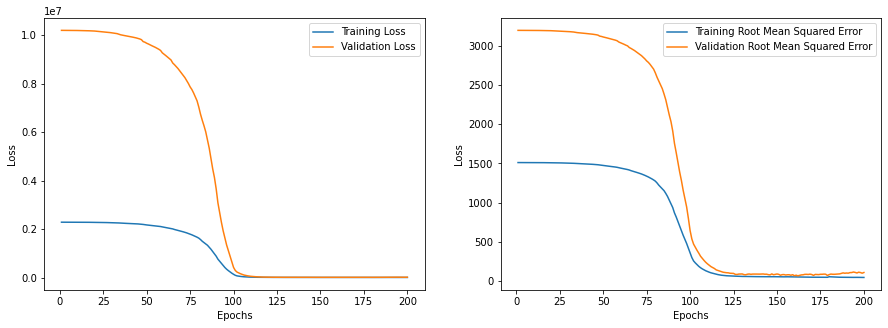

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Amazon

In [87]:
Amazon_prediction = Amazon_Model.predict(Amazon_Test_X)

1/1 [==============================] - 0s 358ms/step


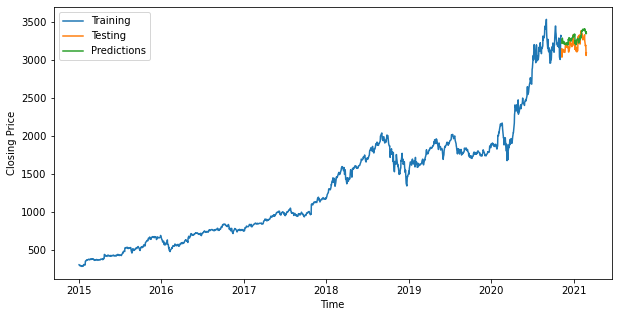

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(Amazon['Date'][Amazon['Date'] < '2020-11-07'], Amazon['Adj. Close'][Amazon['Date'] < '2020-11-07'], label = 'Training')
plt.plot(Amazon['Date'][Amazon['Date'] >= '2020-11-07'], Amazon['Adj. Close'][Amazon['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(Amazon['Date'][Amazon['Date'] >= '2020-11-07'], Amazon_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [89]:
rmse = math.sqrt(mean_squared_error(Amazon_Test_Y.reshape(-1, 5), Amazon_prediction))
mape = np.mean(np.abs(Amazon_prediction - Amazon_Test_Y.reshape(-1, 5))/np.abs(Amazon_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 111.41946821818519
MAPE: 0.02924020520686429


# Google

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

In [42]:
Google_Date = '2020-11-01'
Google_Train_X, Google_Train_Y, Google_Test_X, Google_Test_Y = Dataset(Google, Google_Date)

### Model Fitting

In [91]:
Google_Model = Model()

In [92]:
Google_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [93]:
Google_hist = Google_Model.fit(Google_Train_X, Google_Train_Y, epochs = 1000, validation_data = (Google_Test_X, Google_Test_Y), callbacks = [callback])

Epoch 1/1000
10/10 [==============================] - 4s 68ms/step - loss: 1026429.8125 - root_mean_squared_error: 1013.1288 - val_loss: 3368565.2500 - val_root_mean_squared_error: 1835.3651 - lr: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 19ms/step - loss: 1026414.3750 - root_mean_squared_error: 1013.1211 - val_loss: 3368440.0000 - val_root_mean_squared_error: 1835.3309 - lr: 6.6667e-08
Epoch 3/1000
10/10 [==============================] - 0s 17ms/step - loss: 1026358.4375 - root_mean_squared_error: 1013.0935 - val_loss: 3368196.2500 - val_root_mean_squared_error: 1835.2645 - lr: 1.3333e-07
Epoch 4/1000
10/10 [==============================] - 0s 17ms/step - loss: 1026264.2500 - root_mean_squared_error: 1013.0471 - val_loss: 3367827.2500 - val_root_mean_squared_error: 1835.1642 - lr: 2.0000e-07
Epoch 5/1000
10/10 [==============================] - 0s 18ms/step - loss: 1026128.5625 - root_mean_squared_error: 1012.9801 - val_loss: 3367333.2500 - val_root_mean_sq

In [94]:
history_dict = Google_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

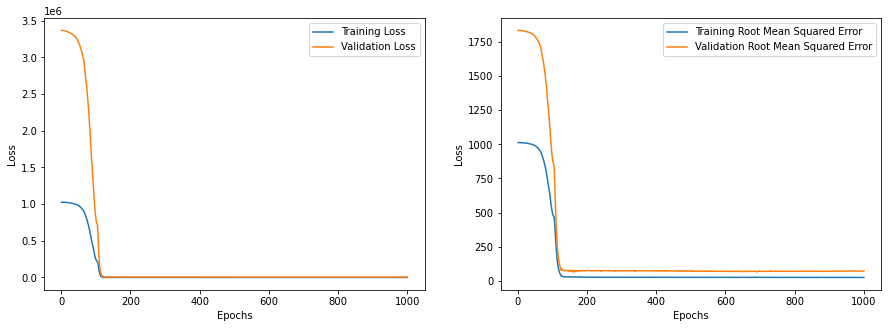

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Google

In [96]:
Google_prediction = Google_Model.predict(Google_Test_X)

1/1 [==============================] - 0s 364ms/step


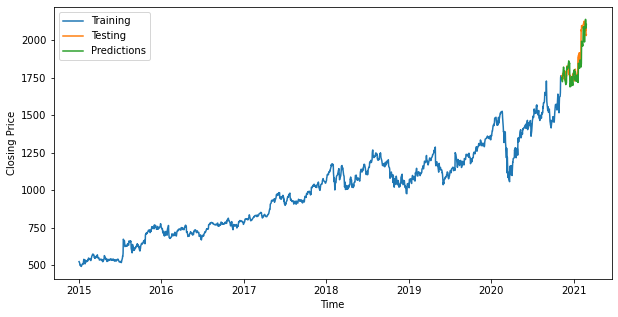

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(Google['Date'][Google['Date'] < '2020-11-07'], Google['Adj. Close'][Google['Date'] < '2020-11-07'], label = 'Training')
plt.plot(Google['Date'][Google['Date'] >= '2020-11-07'], Google['Adj. Close'][Google['Date'] >= '2020-11-07'], label = 'Testing')
plt.plot(Google['Date'][Google['Date'] >= '2020-11-07'], Google_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [98]:
rmse = math.sqrt(mean_squared_error(Google_Test_Y.reshape(-1, 5), Google_prediction))
mape = np.mean(np.abs(Google_prediction - Google_Test_Y.reshape(-1, 5))/np.abs(Google_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 71.52693113240642
MAPE: 0.028388189171176734


# Microsoft

### Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [39]:
Microsoft_Date = '2020-10-01'
Microsoft_Train_X, Microsoft_Train_Y, Microsoft_Test_X, Microsoft_Test_Y = Dataset(Microsoft, Microsoft_Date)

### Model Fitting

In [100]:
Microsoft_Model = Model()

In [101]:
Microsoft_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [102]:
Microsoft_hist = Microsoft_Model.fit(Microsoft_Train_X, Microsoft_Train_Y, epochs = 1000, validation_data = (Microsoft_Test_X, Microsoft_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 2s 67ms/step - loss: 10535.5381 - root_mean_squared_error: 102.6428 - val_loss: 48423.7734 - val_root_mean_squared_error: 220.0540 - lr: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 10535.4551 - root_mean_squared_error: 102.6424 - val_loss: 48422.6367 - val_root_mean_squared_error: 220.0514 - lr: 6.6667e-08
Epoch 3/1000
9/9 [==============================] - 0s 17ms/step - loss: 10535.2002 - root_mean_squared_error: 102.6411 - val_loss: 48420.2812 - val_root_mean_squared_error: 220.0461 - lr: 1.3333e-07
Epoch 4/1000
9/9 [==============================] - 0s 18ms/step - loss: 10534.7725 - root_mean_squared_error: 102.6390 - val_loss: 48416.7734 - val_root_mean_squared_error: 220.0381 - lr: 2.0000e-07
Epoch 5/1000
9/9 [==============================] - 0s 19ms/step - loss: 10534.1299 - root_mean_squared_error: 102.6359 - val_loss: 48412.2695 - val_root_mean_squared_error: 220.0279 - lr: 2.6667e-07


In [103]:
history_dict = Microsoft_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

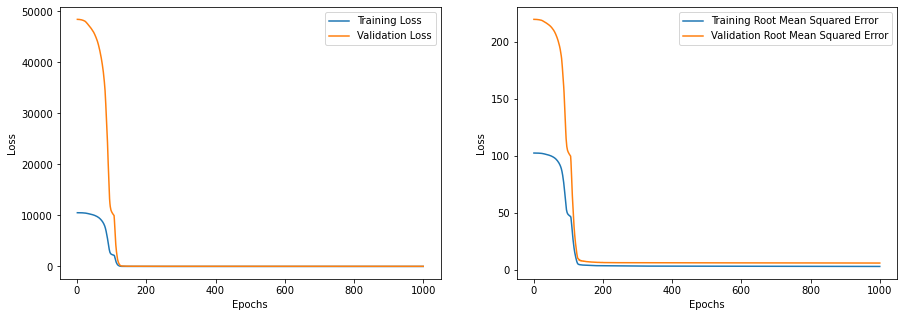

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = "Training Loss")
ax1.plot(epochs, val_loss, label = "Validation Loss")
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Microsoft

In [105]:
Microsoft_prediction = Microsoft_Model.predict(Microsoft_Test_X)

1/1 [==============================] - 0s 329ms/step


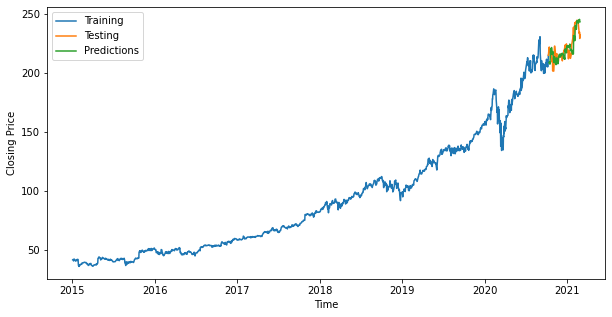

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(Microsoft['Date'][Microsoft['Date'] < '2020-10-12'], Microsoft['Adj. Close'][Microsoft['Date'] < '2020-10-12'], label = 'Training')
plt.plot(Microsoft['Date'][Microsoft['Date'] >= '2020-10-09'], Microsoft['Adj. Close'][Microsoft['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(Microsoft['Date'][Microsoft['Date'] >= '2020-10-12'], Microsoft_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [107]:
rmse = math.sqrt(mean_squared_error(Microsoft_Test_Y.reshape(-1, 5), Microsoft_prediction))
mape = np.mean(np.abs(Microsoft_prediction - Microsoft_Test_Y.reshape(-1, 5))/np.abs(Microsoft_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.023395789408355
MAPE: 0.021386457580021296


### Model - ARIMA

In [39]:
!pip install pmdarima

In [57]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series and help us understand if the series is stationary.

**Null Hypothesis**: The series has a unit root

**Alternate Hypothesis**: The series has no unit root.

If we fail to reject the Null Hypothesis, then the series is non-stationary.

In [42]:
def Test_Stationarity(timeseries):
  result = adfuller(timeseries['Adj. Close'], autolag = 'AIC')
  print("Results of Dickey Fuller Test")
  print(f'Test Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Number of lags used: {result[2]}')
  print(f'Number of observations used: {result[3]}')
  for key, value in result[4].items():
    print(f'critical value ({key}): {value}')

# Apple

In [39]:
# Change Dtype of Date column
Apple["Date"] = pd.to_datetime(Apple["Date"])

In [43]:
Test_Stationarity(Apple)

Results of Dickey Fuller Test
Test Statistics: 1.12072220644336
p-value: 0.9953896550774386
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

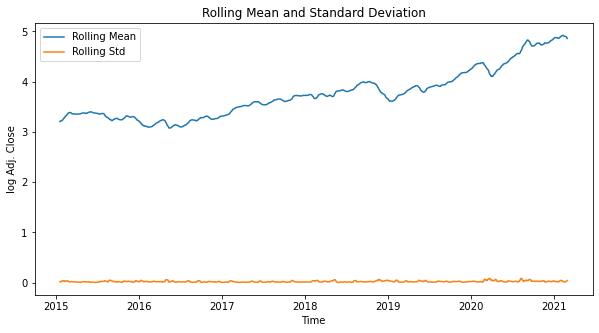

In [44]:
Apple['log Adj. Close'] = np.log(Apple['Adj. Close'])
Apple_log_moving_avg = Apple['log Adj. Close'].rolling(12).mean()
Apple_log_std = Apple['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(Apple['Date'], Apple_log_moving_avg, label = "Rolling Mean")
plt.plot(Apple['Date'], Apple_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

### Split the data into training and test set

    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26







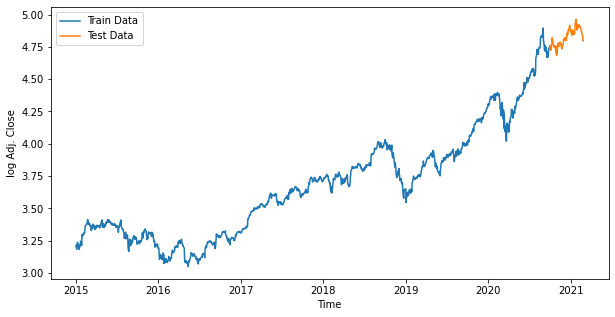

In [45]:
Apple_Train_Data = Apple[Apple['Date'] < '2020-10-01']
Apple_Test_Data = Apple[Apple['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(Apple_Train_Data['Date'], Apple_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(Apple_Test_Data['Date'], Apple_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

### Modeling

In [46]:
Apple_Auto_ARIMA_Model = auto_arima(Apple_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(Apple_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3721.627
Date:                Sat, 13 May 2023   AIC                          -7437.254
Time:                        01:54:28   BIC                          -7421.424
Sample:                             0   HQIC                         -7431.346
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      2.366      0.018       0.000       0.002
ar.L1         -0.0981      0.015     -6.535      0.000      -0.127      -0.069
sigma2         0.0003   6.51e-06     52.314      0.0

In [12]:
Apple_ARIMA_Model = ARIMA(Apple_Train_Data['log Adj. Close'], order = (1, 1, 0))
Apple_ARIMA_Model_Fit = Apple_ARIMA_Model.fit()
print(Apple_ARIMA_Model_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.log Adj. Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3721.627
Method:                       css-mle   S.D. of innovations              0.018
Date:                Wed, 03 Mar 2021   AIC                          -7437.254
Time:                        09:13:01   BIC                          -7421.424
Sample:                             1   HQIC                         -7431.346
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0011      0.000      2.405      0.016       0.000       0.002
ar.L1.D.log Adj. Close    -0.0982      0.026     -3.748      0.000      -0.150      -0.047
    

### Predicting the closing stock price of Apple

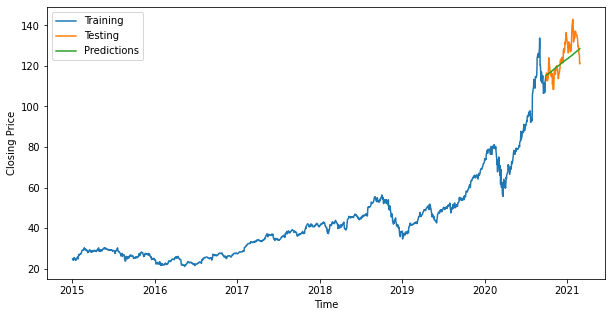

In [13]:
Apple_output = AppleL_ARIMA_Model_Fit.forecast(102, alpha=0.05)
Apple_predictions = np.exp(Apple_output[0])
plt.figure(figsize=(10, 5))
plt.plot(Apple_Train_Data['Date'], Apple_Train_Data['Adj. Close'], label = 'Training')
plt.plot(Apple_Test_Data['Date'], Apple_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(Apple_Test_Data['Date'], Apple_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [14]:
rmse = math.sqrt(mean_squared_error(Apple_Test_Data['Adj. Close'], Apple_predictions))
mape = np.mean(np.abs(Apple_predictions - Apple_Test_Data['Adj. Close'])/np.abs(Apple_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 6.4063833564144845
MAPE: 0.03885097141631591


# Google

In [67]:
# Change Dtype of Date column
Google["Date"] = pd.to_datetime(Google["Date"])

In [60]:
Test_Stationarity(Google)

Results of Dickey Fuller Test
Test Statistics: 0.6722962942047445
p-value: 0.9892684650395427
Number of lags used: 22
Number of observations used: 1526
critical value (1%): -3.4346424863111396
critical value (5%): -2.8634358661653803
critical value (10%): -2.5677793320839823


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

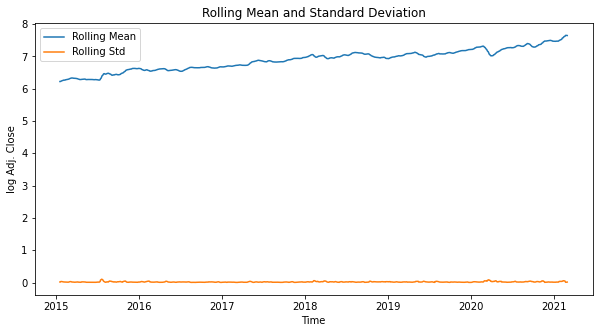

In [61]:
Google['log Adj. Close'] = np.log(Google['Adj. Close'])
Google_log_moving_avg = Google['log Adj. Close'].rolling(12).mean()
Google_log_std = Google['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(Google['Date'], Google_log_moving_avg, label = "Rolling Mean")
plt.plot(Google['Date'], Google_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

### Split the data into training and test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

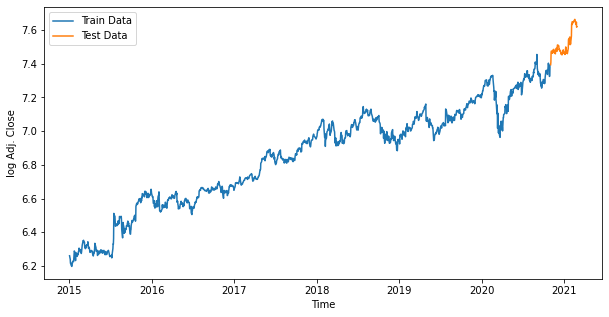

In [62]:
Google_Train_Data = Google[Google['Date'] < '2020-11-01']
Google_Test_Data = Google[Google['Date'] >= '2020-11-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(Google_Train_Data['Date'], Google_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(Google_Test_Data['Date'], Google_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

### Modeling

In [63]:
Google_Auto_ARIMA_Model = auto_arima(Google_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(Google_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1469
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3905.939
Date:                Sat, 13 May 2023   AIC                          -7805.878
Time:                        02:04:55   BIC                          -7790.003
Sample:                             0   HQIC                         -7799.958
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      1.882      0.060   -3.47e-05       0.002
ar.L1         -0.0876      0.015     -5.798      0.000      -0.117      -0.058
sigma2         0.0003   4.48e-06     63.886      0.0

In [32]:
Google_ARIMA_Model = ARIMA(Google_Train_Data['log Adj. Close'], order = (1, 1, 0))
Google_ARIMA_Model_Fit = Google_ARIMA_Model.fit()
print(Google_ARIMA_Model_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.log Adj. Close   No. Observations:                 1468
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3905.939
Method:                       css-mle   S.D. of innovations              0.017
Date:                Wed, 03 Mar 2021   AIC                          -7805.879
Time:                        09:13:56   BIC                          -7790.004
Sample:                             1   HQIC                         -7799.958
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0008      0.000      1.896      0.058    -2.6e-05       0.002
ar.L1.D.log Adj. Close    -0.0877      0.026     -3.367      0.001      -0.139      -0.037
    

### Predicting the closing stock price of Google

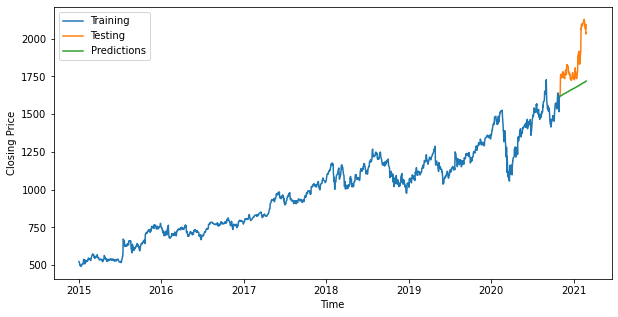

In [33]:
Google_output = Google_ARIMA_Model_Fit.forecast(80, alpha=0.05)
Google_predictions = np.exp(Google_output[0])
plt.figure(figsize=(10, 5))
plt.plot(Google_Train_Data['Date'], Google_Train_Data['Adj. Close'], label = 'Training')
plt.plot(Google_Test_Data['Date'], Google_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(Google_Test_Data['Date'], Google_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [34]:
rmse = math.sqrt(mean_squared_error(Google_Test_Data['Adj. Close'], Google_predictions))
mape = np.mean(np.abs(Google_predictions - Google_Test_Data['Adj. Close'])/np.abs(Google_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 210.40237555557943
MAPE: 0.09222702265794448


# Microsoft

In [67]:
Microsoft.head()

,Date,Open,High,Low,Close,Adj. Close,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days
0,2015-01-02,46.66,47.42,46.54,46.76,41.44,27913900.0,NaN,NaN,NaN
1,2015-01-05,46.37,46.73,46.25,46.33,41.06,39673900.0,NaN,NaN,NaN
2,2015-01-06,46.38,46.75,45.54,45.65,40.46,36447900.0,NaN,NaN,NaN
3,2015-01-07,45.98,46.46,45.49,46.23,40.97,29114100.0,NaN,NaN,NaN
4,2015-01-08,46.75,47.75,46.72,47.59,42.18,29645200.0,NaN,NaN,NaN


In [69]:
Microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1549 non-null   datetime64[ns]
 1   Open                        1549 non-null   float64       
 2   High                        1549 non-null   float64       
 3   Low                         1549 non-null   float64       
 4   Close                       1549 non-null   float64       
 5   Adj. Close                  1549 non-null   float64       
 6   Volume                      1549 non-null   float64       
 7   Moving Average for 10 days  1540 non-null   float64       
 8   Moving Average for 20 days  1530 non-null   float64       
 9   Moving Average for 50 days  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 121.1 KB


In [70]:
# Change Dtype of Date column
Microsoft["Date"] = pd.to_datetime(Microsoft["Date"])

In [71]:
Test_Stationarity(Microsoft)

Results of Dickey Fuller Test
Test Statistics: 2.1271168914605716
p-value: 0.9988169756931882
Number of lags used: 24
Number of observations used: 1524
critical value (1%): -3.4346481290263013
critical value (5%): -2.8634383565975736
critical value (10%): -2.567780658251872


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

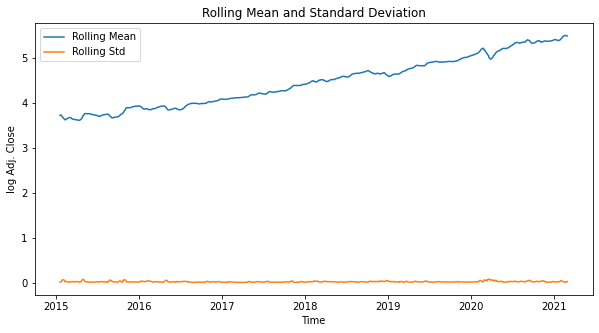

In [72]:
Microsoft['log Adj. Close'] = np.log(Microsoft['Adj. Close'])
Microsoft_log_moving_avg = Microsoft['log Adj. Close'].rolling(12).mean()
Microsoft_log_std = Microsoft['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(Microsoft['Date'], Microsoft_log_moving_avg, label = "Rolling Mean")
plt.plot(Microsoft['Date'], Microsoft_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

### Split the data into training and test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

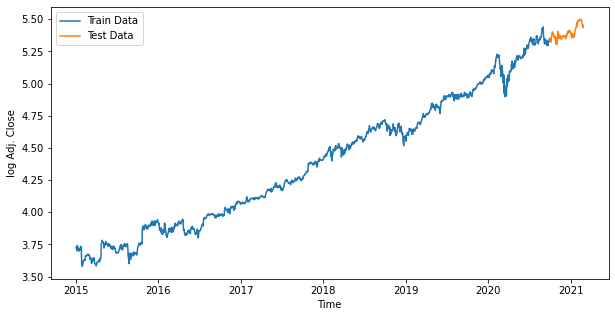

In [73]:
Microsoft_Train_Data = Microsoft[Microsoft['Date'] < '2020-10-01']
Microsoft_Test_Data = Microsoft[Microsoft['Date'] >= '2020-10-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(Microsoft_Train_Data['Date'], Microsoft_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(Microsoft_Test_Data['Date'], Microsoft_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

### Modeling

In [74]:
Microsoft_Auto_ARIMA_Model = auto_arima(Microsoft_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(Microsoft_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1447
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3828.056
Date:                Sat, 13 May 2023   AIC                          -7650.112
Time:                        02:24:50   BIC                          -7634.282
Sample:                             0   HQIC                         -7644.204
                               - 1447                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      2.995      0.003       0.000       0.002
ar.L1         -0.2169      0.012    -18.786      0.000      -0.239      -0.194
sigma2         0.0003   5.01e-06     58.650      0.0

In [42]:
Microsoft_ARIMA_Model = ARIMA(Microsoft_Train_Data['log Adj. Close'], order = (1, 1, 0))
Microsoft_ARIMA_Model_Fit = Microsoft_ARIMA_Model.fit()
print(Microsoft_ARIMA_Model_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.log Adj. Close   No. Observations:                 1446
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3828.056
Method:                       css-mle   S.D. of innovations              0.017
Date:                Wed, 03 Mar 2021   AIC                          -7650.112
Time:                        09:14:01   BIC                          -7634.283
Sample:                             1   HQIC                         -7644.204
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0011      0.000      3.022      0.003       0.000       0.002
ar.L1.D.log Adj. Close    -0.2168      0.026     -8.445      0.000      -0.267      -0.166
    

### Predicting the closing stock price of Microsoft

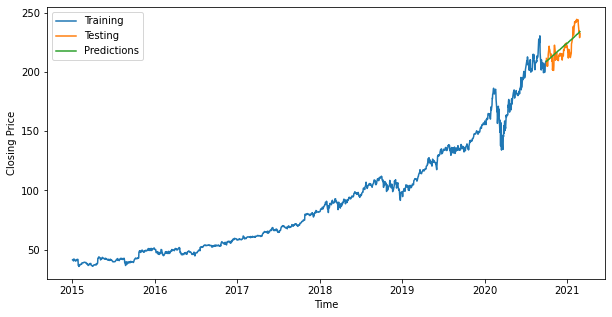

In [43]:
Microsoft_output = Microsoft_ARIMA_Model_Fit.forecast(102, alpha=0.05)
Microsoft_predictions = np.exp(Microsoft_output[0])
plt.figure(figsize=(10, 5))
plt.plot(Microsoft_Train_Data['Date'], Microsoft_Train_Data['Adj. Close'], label = 'Training')
plt.plot(Microsoft_Test_Data['Date'], Microsoft_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(Microsoft_Test_Data['Date'], Microsoft_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [44]:
rmse = math.sqrt(mean_squared_error(Microsoft_Test_Data['Adj. Close'], Microsoft_predictions))
mape = np.mean(np.abs(Microsoft_predictions - Microsoft_Test_Data['Adj. Close'])/np.abs(Microsoft_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 7.269511877014612
MAPE: 0.027081038152935593


# Amazon

In [75]:
Amazon.head()

,Date,Open,High,Low,Close,Adj. Close,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days
0,2015-01-02,312.58,314.75,306.96,308.52,308.52,2783200.0,NaN,NaN,NaN
1,2015-01-05,307.01,308.38,300.85,302.19,302.19,2774200.0,NaN,NaN,NaN
2,2015-01-06,302.24,303.00,292.38,295.29,295.29,3519000.0,NaN,NaN,NaN
3,2015-01-07,297.50,301.28,295.33,298.42,298.42,2640300.0,NaN,NaN,NaN
4,2015-01-08,300.32,303.14,296.11,300.46,300.46,3088400.0,NaN,NaN,NaN


In [76]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1549 non-null   datetime64[ns]
 1   Open                        1549 non-null   float64       
 2   High                        1549 non-null   float64       
 3   Low                         1549 non-null   float64       
 4   Close                       1549 non-null   float64       
 5   Adj. Close                  1549 non-null   float64       
 6   Volume                      1549 non-null   float64       
 7   Moving Average for 10 days  1540 non-null   float64       
 8   Moving Average for 20 days  1530 non-null   float64       
 9   Moving Average for 50 days  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 121.1 KB


In [78]:
# Change Dtype of Date column
Amazon["Date"] = pd.to_datetime(Amazon["Date"])

In [79]:
Test_Stationarity(Amazon)

Results of Dickey Fuller Test
Test Statistics: 0.270340963440505
p-value: 0.9759420712303011
Number of lags used: 18
Number of observations used: 1530
critical value (1%): -3.434631245212095
critical value (5%): -2.8634309048528066
critical value (10%): -2.5677766901619035


The p-value > 0.05, so we cannot reject the Null hypothesis. Hence, we would need to use the “Integrated (I)” concept, denoted by value ‘d’ in time series, to make the data stationary while building the Auto ARIMA model.

Now let's take log of the 'Adj. Close' column to reduce the magnitude of the values and reduce the series rising trend.

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

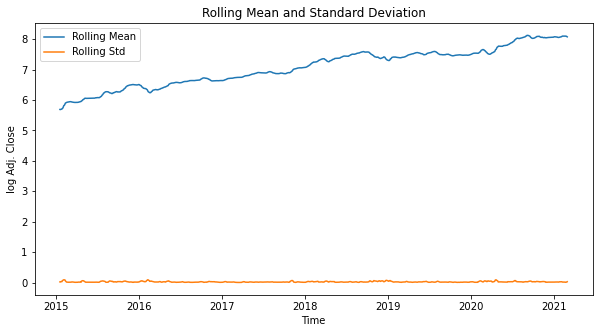

In [81]:
Amazon['log Adj. Close'] = np.log(Amazon['Adj. Close'])
Amazon_log_moving_avg = Amazon['log Adj. Close'].rolling(12).mean()
Amazon_log_std = Amazon['log Adj. Close'].rolling(12).std()

plt.figure(figsize = (10, 5))
plt.plot(Amazon['Date'], Amazon_log_moving_avg, label = "Rolling Mean")
plt.plot(Amazon['Date'], Amazon_log_std, label = "Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

### Split the data into training and test set
    Training Period: 2015-01-02 - 2020-10-30

    Testing Period:  2020-11-02 - 2021-02-26

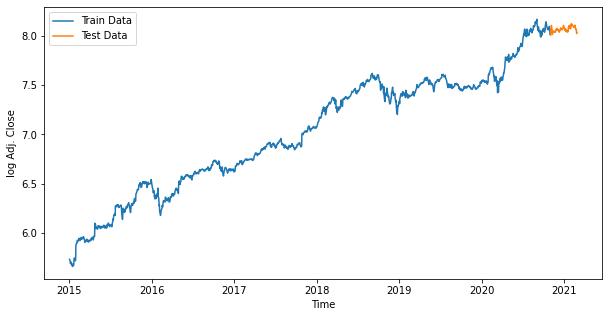

In [82]:
Amazon_Train_Data = Amazon[Amazon['Date'] < '2020-11-01']
Amazon_Test_Data = Amazon[Amazon['Date'] >= '2020-11-01'].reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.plot(Amazon_Train_Data['Date'], Amazon_Train_Data['log Adj. Close'], label = 'Train Data')
plt.plot(Amazon_Test_Data['Date'], Amazon_Test_Data['log Adj. Close'], label = 'Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj. Close')
plt.legend(loc = 'best')

### Modeling

In [83]:
Amazon_Auto_ARIMA_Model = auto_arima(Amazon_Train_Data['log Adj. Close'], seasonal = False,
                                   error_action = 'ignore', suppress_warnings = True)
print(Amazon_Auto_ARIMA_Model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1469
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3704.612
Date:                Sat, 13 May 2023   AIC                          -7405.225
Time:                        02:29:28   BIC                          -7394.641
Sample:                             0   HQIC                         -7401.278
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      3.025      0.002       0.001       0.003
sigma2         0.0004   6.92e-06     54.419      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.40   Jarque-

In [52]:
Amazon_ARIMA_Model = ARIMA(Amazon_Train_Data['log Adj. Close'], order = (0, 1, 0))
Amazon_ARIMA_Model_Fit = Amazon_ARIMA_Model.fit()
print(Amazon_ARIMA_Model_Fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.log Adj. Close   No. Observations:                 1468
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3704.612
Method:                           css   S.D. of innovations              0.019
Date:                Wed, 03 Mar 2021   AIC                          -7405.225
Time:                        09:14:06   BIC                          -7394.641
Sample:                             1   HQIC                         -7401.278
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      3.076      0.002       0.001       0.003


### Predicting the closing stock price of Amazon

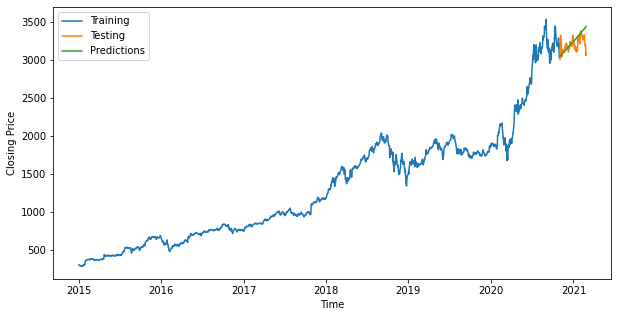

In [53]:
Amazon_output = Amazon_ARIMA_Model_Fit.forecast(80, alpha=0.05)
Amazon_predictions = np.exp(Amazon_output[0])
plt.figure(figsize=(10, 5))
plt.plot(Amazon_Train_Data['Date'], Amazon_Train_Data['Adj. Close'], label = 'Training')
plt.plot(Amazon_Test_Data['Date'], Amazon_Test_Data['Adj. Close'], label = 'Testing')
plt.plot(Amazon_Test_Data['Date'], Amazon_predictions, label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

In [54]:
rmse = math.sqrt(mean_squared_error(Amazon_Test_Data['Adj. Close'], Amazon_predictions))
mape = np.mean(np.abs(Amazon_predictions - Amazon_Test_Data['Adj. Close'])/np.abs(Amazon_Test_Data['Adj. Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 113.18558052462348
MAPE: 0.02500054538949603


### Model - SVR

## Apple

In [43]:
from sklearn.svm import SVR
model = SVR()

In [44]:
Apple_Train_X = Apple_Train_X.reshape(-1, 1)
Apple_Test_X = Apple_Test_X.reshape(-1, 1)
Apple_Train_Y = Apple_Train_Y.ravel()
Apple_Test_Y = Apple_Test_Y.ravel()

In [48]:
# Train the SVR model
model.fit(Apple_Train_X, Apple_Train_Y)

SVR()

In [49]:
# Predict on the test data
y_pred = model.predict(Apple_Test_X)

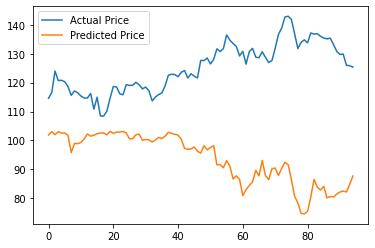

In [50]:
# Plot the results
plt.plot(Apple_Test_Y, label='Actual Price')
plt.plot(y_pred.flatten(), label='Predicted Price')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(Apple_Test_Y, y_pred, squared=False)
mae = mean_absolute_error(Apple_Test_Y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 35.18087916339638
MAE: 31.415628224085967


## Google

In [52]:
from sklearn.svm import SVR
model = SVR()

In [57]:
Google_Train_X = Google_Train_X.reshape(-1, 1)
Google_Test_X = Google_Test_X.reshape(-1, 1)
Google_Train_Y = Google_Train_Y.ravel()
Google_Test_Y = Google_Test_Y.ravel()

In [54]:
# Train the SVR model
model.fit(Google_Train_X, Google_Train_Y)

SVR()

In [55]:
# Predict on the test data
y_pred = model.predict(Google_Test_X)

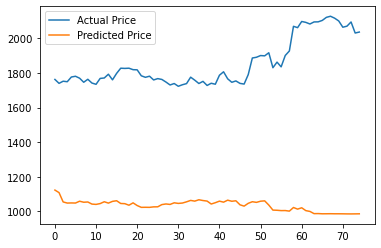

In [58]:
# Plot the results
plt.plot(Google_Test_Y, label='Actual Price')
plt.plot(y_pred.flatten(), label='Predicted Price')
plt.legend()
plt.show()

In [60]:
rmse = mean_squared_error(Google_Test_Y, y_pred, squared=False)
mae = mean_absolute_error(Google_Test_Y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 834.4765019301941
MAE: 819.2130769550131


## Microsoft

In [71]:
from sklearn.svm import SVR
model = SVR()

In [72]:
Microsoft_Train_X = Microsoft_Train_X.reshape(-1, 1)
Microsoft_Test_X = Microsoft_Test_X.reshape(-1, 1)
Microsoft_Train_Y = Microsoft_Train_Y.ravel()
Microsoft_Test_Y = Microsoft_Test_Y.ravel()

In [73]:
# Train the SVR model
model.fit(Microsoft_Train_X, Microsoft_Train_Y)

SVR()

In [74]:
# Predict on the test data
y_pred = model.predict(Microsoft_Test_X)

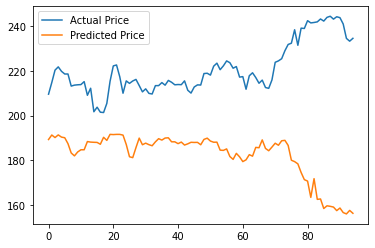

In [75]:
# Plot the results
plt.plot(Microsoft_Test_Y, label='Actual Price')
plt.plot(y_pred.flatten(), label='Predicted Price')
plt.legend()
plt.show()

In [76]:
rmse = mean_squared_error(Microsoft_Test_Y, y_pred, squared=False)
mae = mean_absolute_error(Microsoft_Test_Y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 43.57879243645975
MAE: 38.48932191646605


## Amazon

In [37]:
from sklearn.svm import SVR
model = SVR()

In [40]:
Amazon_Train_X = Amazon_Train_X.reshape(-1, 1)
Amazon_Test_X = Amazon_Test_X.reshape(-1, 1)
Amazon_Train_Y = Amazon_Train_Y.ravel()
Amazon_Test_Y = Amazon_Test_Y.ravel()

In [41]:
# Train the SVR model
model.fit(Amazon_Train_X, Amazon_Train_Y)

SVR()

In [42]:
# Predict on the test data
y_pred = model.predict(Amazon_Test_X)

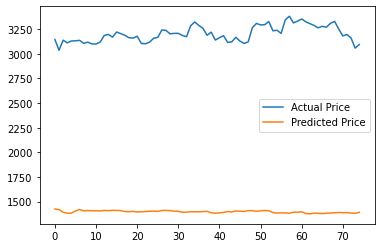

In [43]:
# Plot the results
plt.plot(Amazon_Test_Y, label='Actual Price')
plt.plot(y_pred.flatten(), label='Predicted Price')
plt.legend()
plt.show()

In [44]:
rmse = mean_squared_error(Amazon_Test_Y, y_pred, squared=False)
mae = mean_absolute_error(Amazon_Test_Y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 1805.7379512418481
MAE: 1803.776608269414
